# acceptance factor of (e,e'pp)/(e,e'p) ratio 

# imports

In [1]:
from notebook_tools import *
%matplotlib inline

Welcome to ROOTaaS 6.06/02


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# read data

In [2]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv')

# histograms of fractions of lost events in each p(miss) bin

In [3]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
pmiss_multiples_bins , pmiss_bin_center = [] , []
for i in range(len(PmissBins)):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    for j in range(4):
        pmiss_multiples_bins.append( [ pmin + float(j*(pmax-pmin))/4 , pmin + float((j+1)*(pmax-pmin))/4 ])
print 'pmiss_multiples_bins:',pmiss_multiples_bins
for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
print 'pmiss_bin_center:',pmiss_bin_center

pmiss_multiples_bins: [[0.3, 0.3375], [0.3375, 0.375], [0.375, 0.4125], [0.4125, 0.45], [0.45, 0.47500000000000003], [0.47500000000000003, 0.5], [0.5, 0.525], [0.525, 0.55], [0.55, 0.5750000000000001], [0.5750000000000001, 0.6000000000000001], [0.6000000000000001, 0.625], [0.625, 0.65], [0.65, 0.675], [0.675, 0.7], [0.7, 0.725], [0.725, 0.75], [0.75, 0.8125], [0.8125, 0.875], [0.875, 0.9375], [0.9375, 1.0]]
pmiss_bin_center: [0.31875, 0.35625, 0.39375, 0.43125, 0.4625, 0.48750000000000004, 0.5125, 0.5375000000000001, 0.5625, 0.5875000000000001, 0.6125, 0.6375, 0.6625000000000001, 0.6875, 0.7124999999999999, 0.7375, 0.78125, 0.84375, 0.90625, 0.96875]


(array([  326.,   347.,   401.,   488.,   870.,  2037.,  5495.,  6998.,
         1074.,   507.]),
 array([ 0.52514384,  0.57237004,  0.61959625,  0.66682245,  0.71404865,
         0.76127486,  0.80850106,  0.85572726,  0.90295347,  0.95017967,
         0.99740587]),
 <a list of 10 Patch objects>)

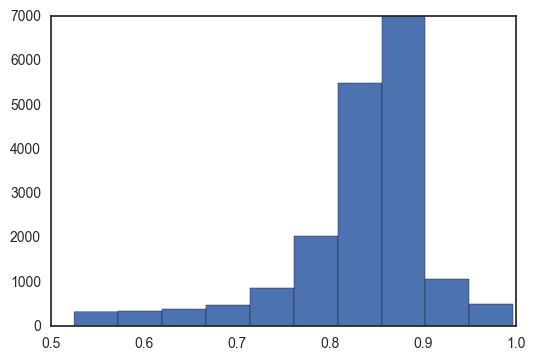

In [4]:
sims
plt.hist((9907*10-sims.NentriesSimRun)/(9907*10))

ploting loss in 0.300 < p(miss) < 0.338 GeV/c (corecction=6.0)
ploting loss in 0.338 < p(miss) < 0.375 GeV/c (corecction=6.0)
ploting loss in 0.375 < p(miss) < 0.412 GeV/c (corecction=5.7)
ploting loss in 0.412 < p(miss) < 0.450 GeV/c (corecction=5.7)
ploting loss in 0.450 < p(miss) < 0.475 GeV/c (corecction=5.6)
ploting loss in 0.475 < p(miss) < 0.500 GeV/c (corecction=5.8)
ploting loss in 0.500 < p(miss) < 0.525 GeV/c (corecction=5.7)
ploting loss in 0.525 < p(miss) < 0.550 GeV/c (corecction=5.8)
ploting loss in 0.550 < p(miss) < 0.575 GeV/c (corecction=6.1)
ploting loss in 0.575 < p(miss) < 0.600 GeV/c (corecction=6.1)
ploting loss in 0.600 < p(miss) < 0.625 GeV/c (corecction=6.1)
ploting loss in 0.625 < p(miss) < 0.650 GeV/c (corecction=6.3)
ploting loss in 0.650 < p(miss) < 0.675 GeV/c (corecction=6.4)
ploting loss in 0.675 < p(miss) < 0.700 GeV/c (corecction=6.4)
ploting loss in 0.700 < p(miss) < 0.725 GeV/c (corecction=6.4)
ploting loss in 0.725 < p(miss) < 0.750 GeV/c (coreccti

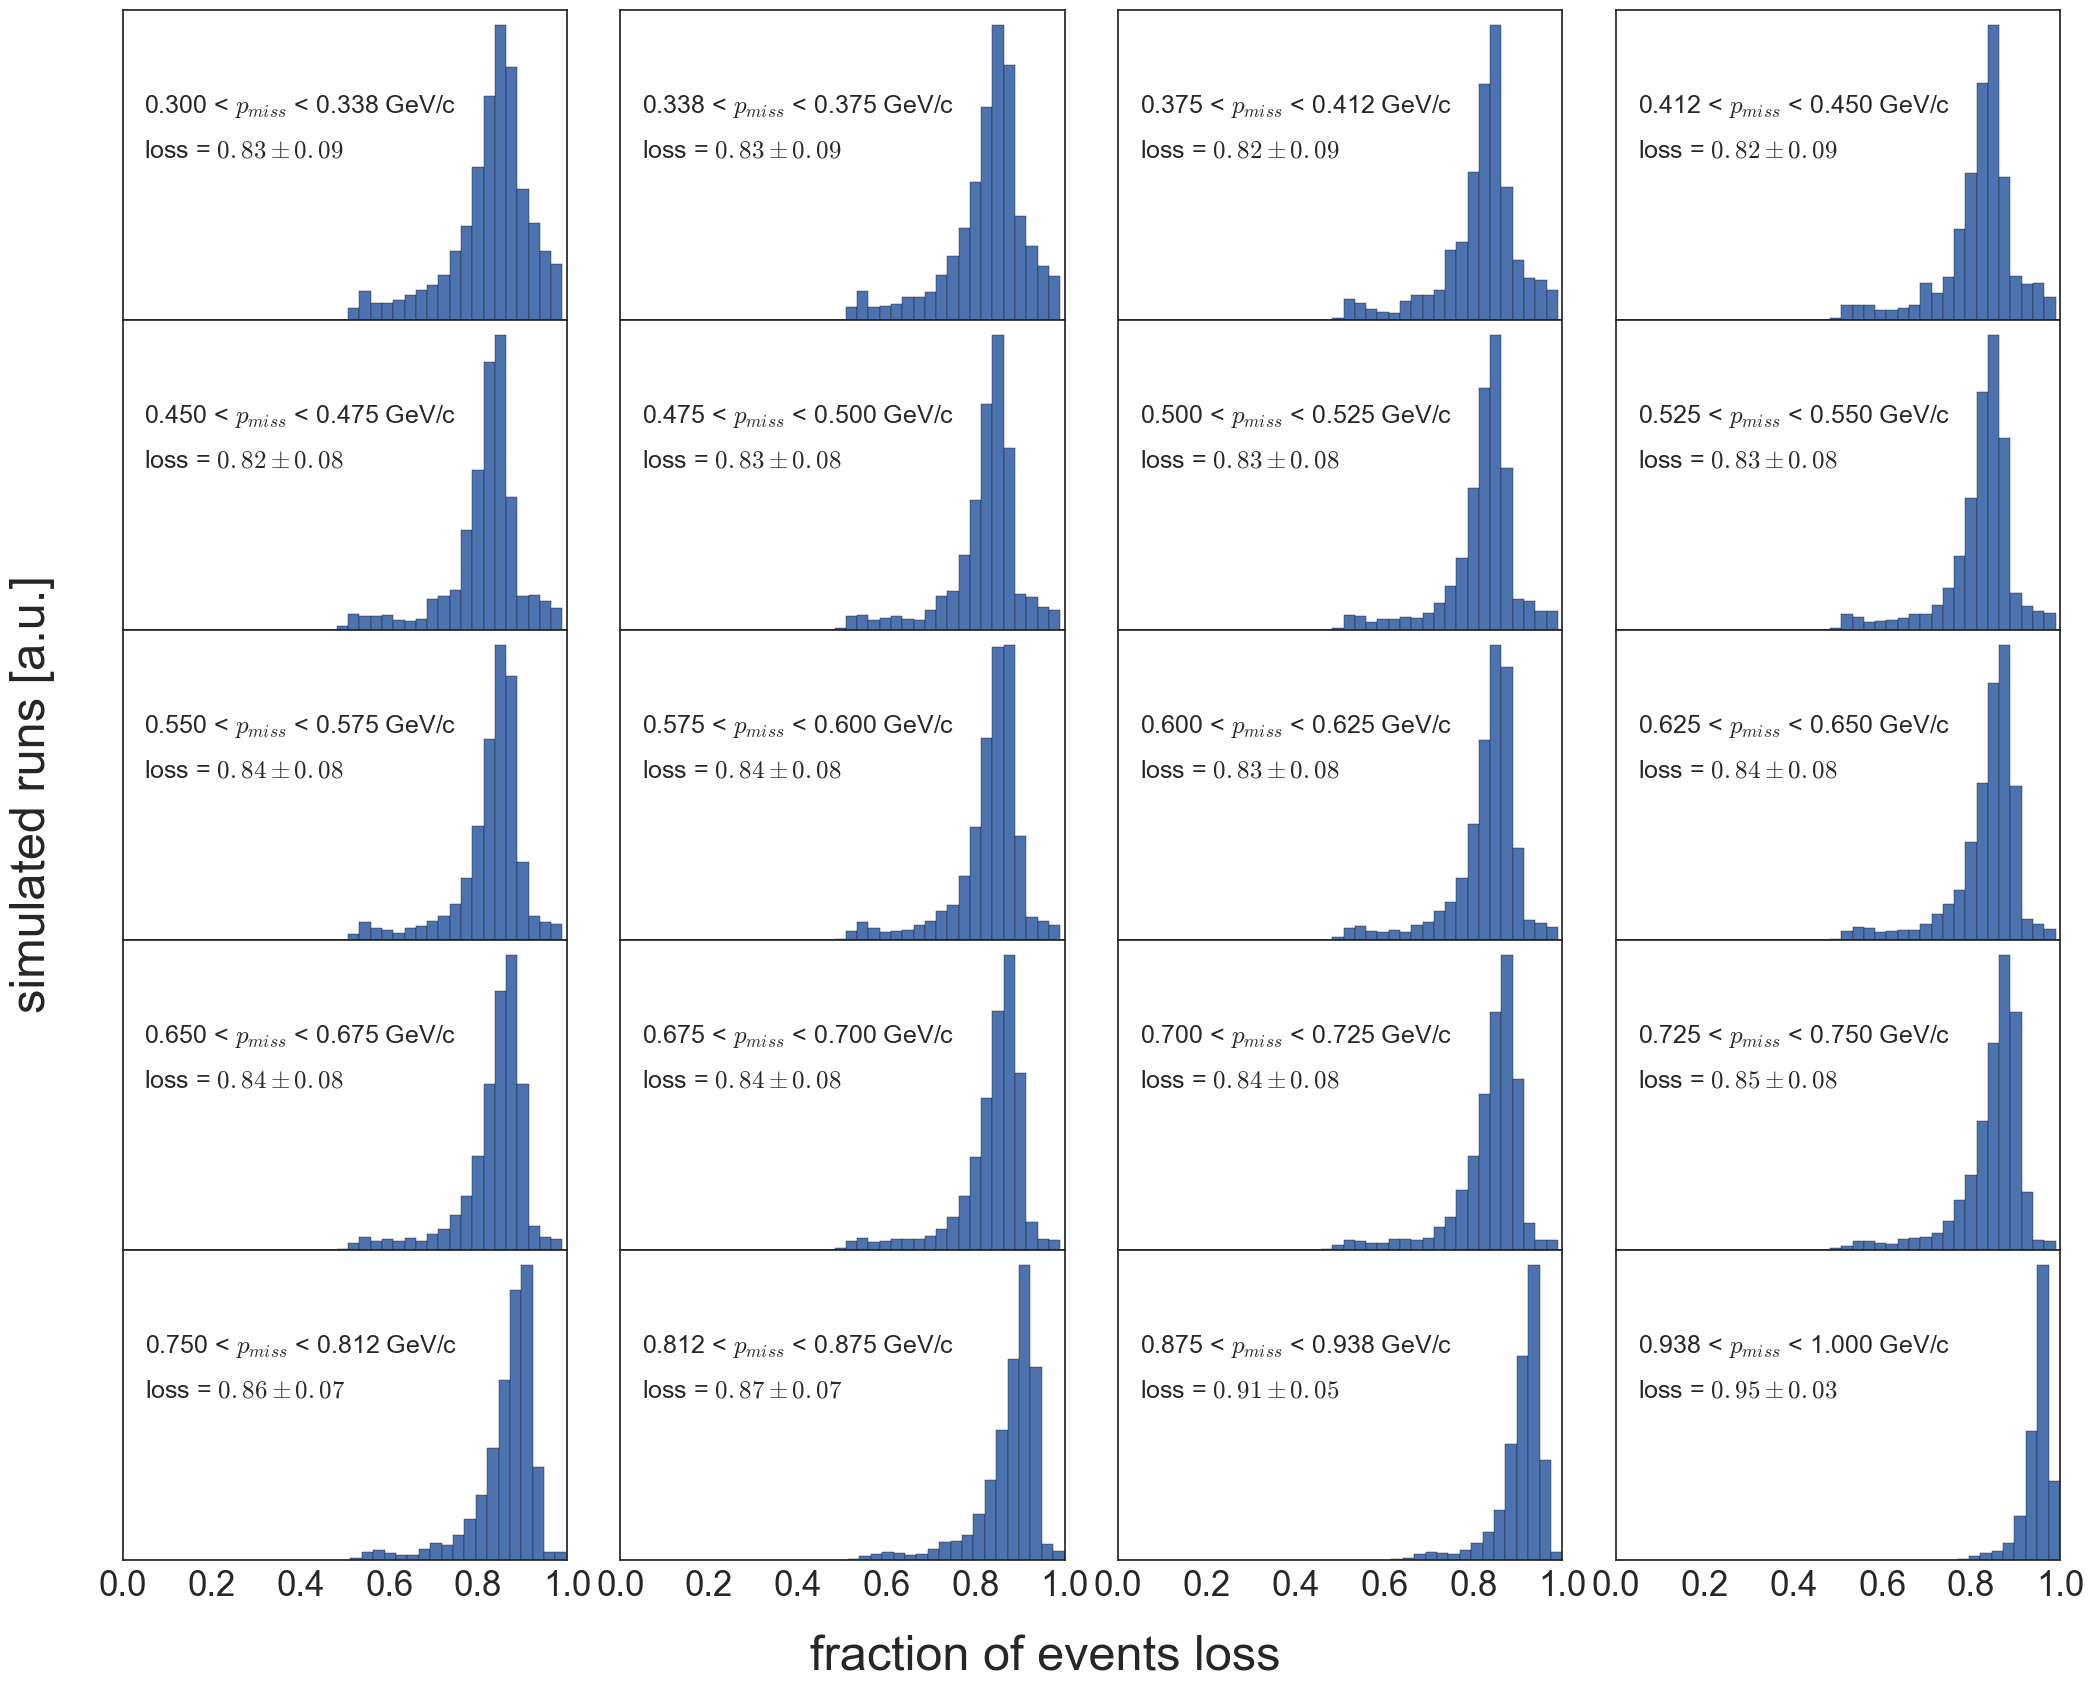

In [5]:
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from pylab import *
majorLocator   = MultipleLocator(0.01)
pmiss_bin_center , loss , loss_err , correction , correction_err = [] , [] , [] , [] , []

figure = plt.figure(figsize=(25,20))
for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
    ax = figure.add_subplot(5,4,i+1)
    if (i < len(pmiss_multiples_bins)-4 ) :     
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.xaxis.set_major_locator( majorLocator )
    ax.yaxis.set_major_formatter( NullFormatter() )
    h , bins , patches = plt.hist( sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)] , bins=np.linspace(0,1,40) , normed=1);
    text(0.05,0.7*h.max(),'%.3f < $p_{miss}$ < %.3f GeV/c'%(pmin , pmax),fontsize=18)
    loss.append(np.average(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)]))
    loss_err.append(np.std(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)]))
    correction.append(1./(1-loss[-1]))
    correction_err.append(loss_err[-1]/np.square(1-loss[-1]))


    text(0.05,0.55*h.max(),'loss = $%.2f\\pm%.2f$'%(loss[-1],loss_err[-1]),fontsize=18)
    set_axes( ax , '' , '' )
    ax.set_ylim(0,1.05*h.max())
    print 'ploting loss in %.3f < p(miss) < %.3f GeV/c (corecction=%.1f)'%(pmin , pmax,correction[-1])

subplots_adjust(wspace=0.12,hspace=0)
figtext(0.4,0.07,"fraction of events loss",fontdict={'fontsize':35})
figtext(0.08,0.6,"simulated runs [a.u.]",fontdict={'fontsize':35},rotation=90)
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossIn20PmissBins.pdf')

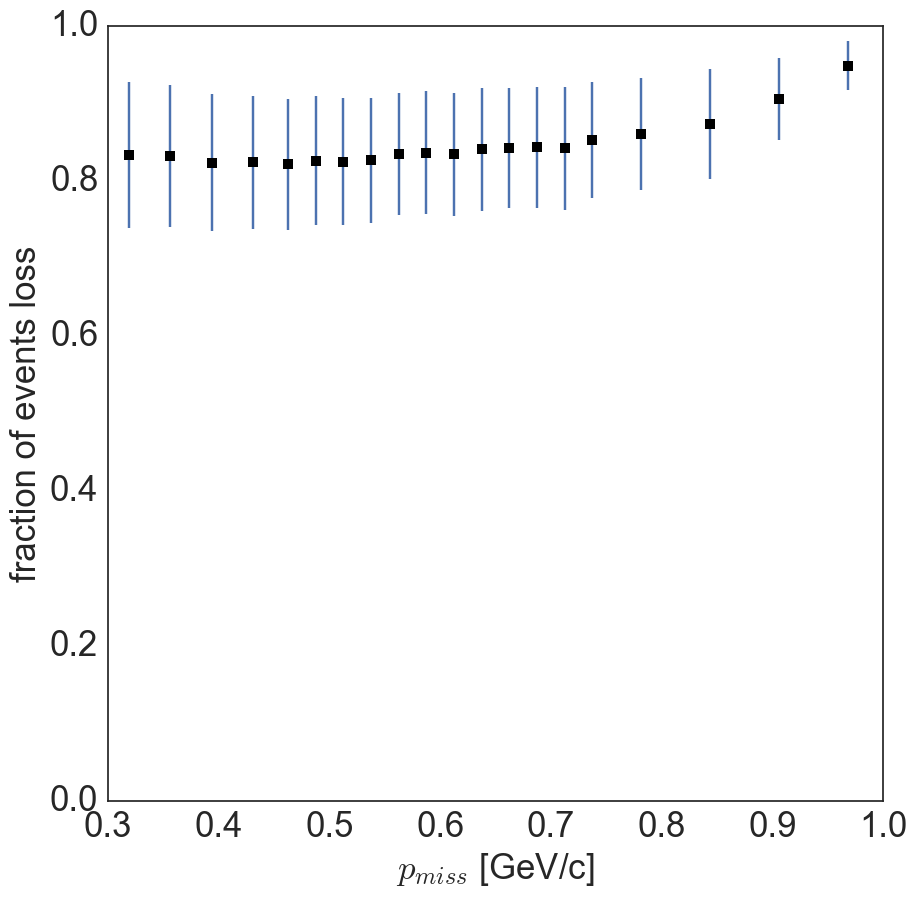

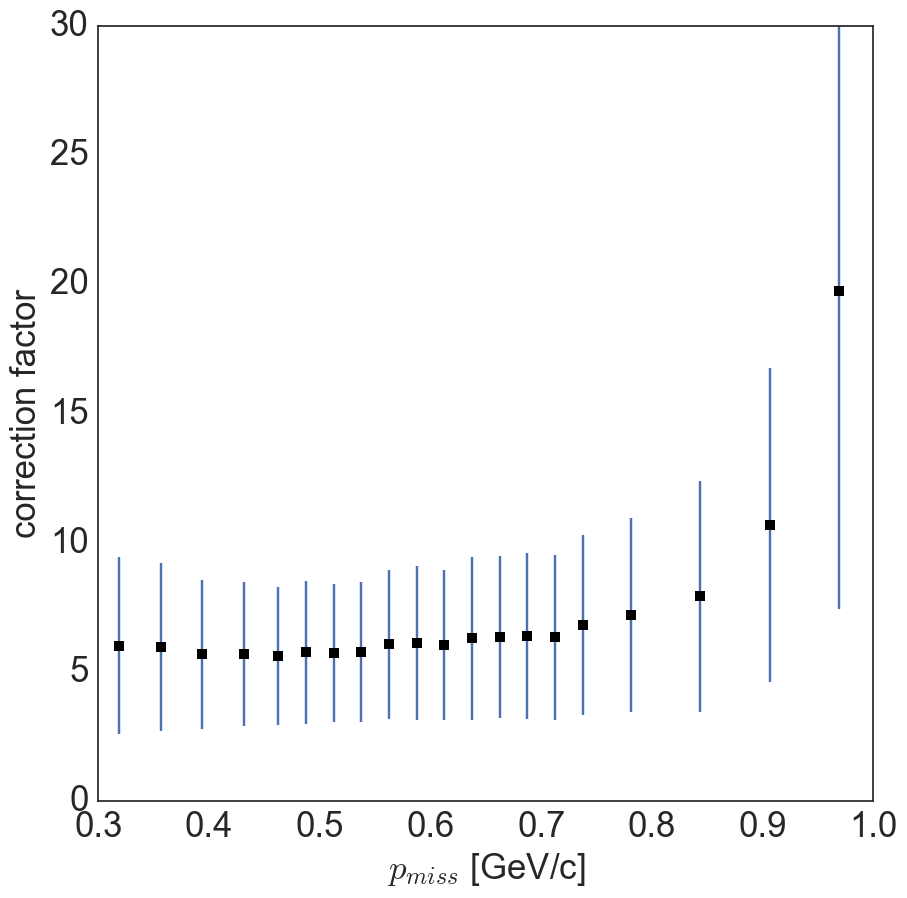

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
plt.plot(pmiss_bin_center,loss, marker='s', color='black' ,linewidth=0)
ax.errorbar(pmiss_bin_center,loss,yerr=loss_err,fmt=None, color='black',error_kw=dict(ecolor='red', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,1)
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='fraction of events loss')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossVsPmiss.pdf')

fig,ax=plt.subplots(figsize=(10,10))
plt.plot(pmiss_bin_center,correction, marker='s', color='black' ,linewidth=0)
ax.errorbar(pmiss_bin_center,correction,yerr=correction_err,fmt=None, color='black',error_kw=dict(ecolor='red', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,30)
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='correction factor')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_correctionVsPmiss.pdf')

# (e,e'pp)/(e,e'p) ratio from DATA before acceptance correction

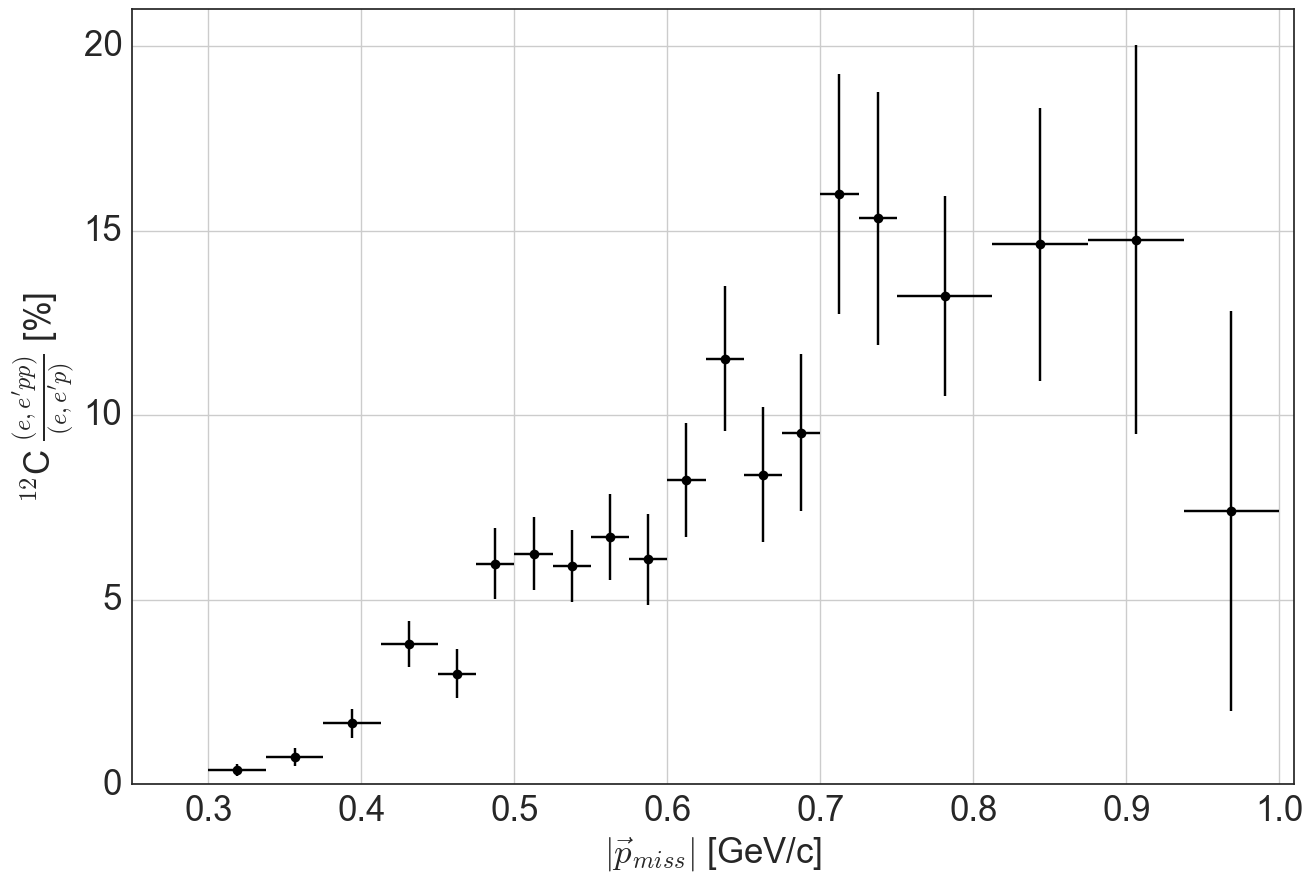

In [7]:
target = 'C12'
name = '$^{12}$C'
eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

fig,ax = plt.subplots(figsize=(15,10))
pmiss_bin_width  , eep_in_bin , eepp_in_bin , ratio , ratio_err = [] , [] , [] , [] , []
for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_width.append( 0.5*(pmax - pmin) )
    eep_in_bin.append( eep.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
    eepp_in_bin.append( eepp.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
    ratio.append(100*float(eepp_in_bin[-1])/eep_in_bin[-1])
    ratio_err.append(ratio[-1] * np.sqrt(1./eepp_in_bin[-1] + 1./eep_in_bin[-1]))


eep.Close()
eepp.Close()
plt.errorbar(pmiss_bin_center,ratio,xerr=pmiss_bin_width,yerr=ratio_err,fmt='ro', color='black')
set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
ax.grid()
ax.set_ylim(0,21)
ax.set_xlim(0.25,1.01)
fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/C_eepp_eep_NotCorrectedForAcceptance.pdf')

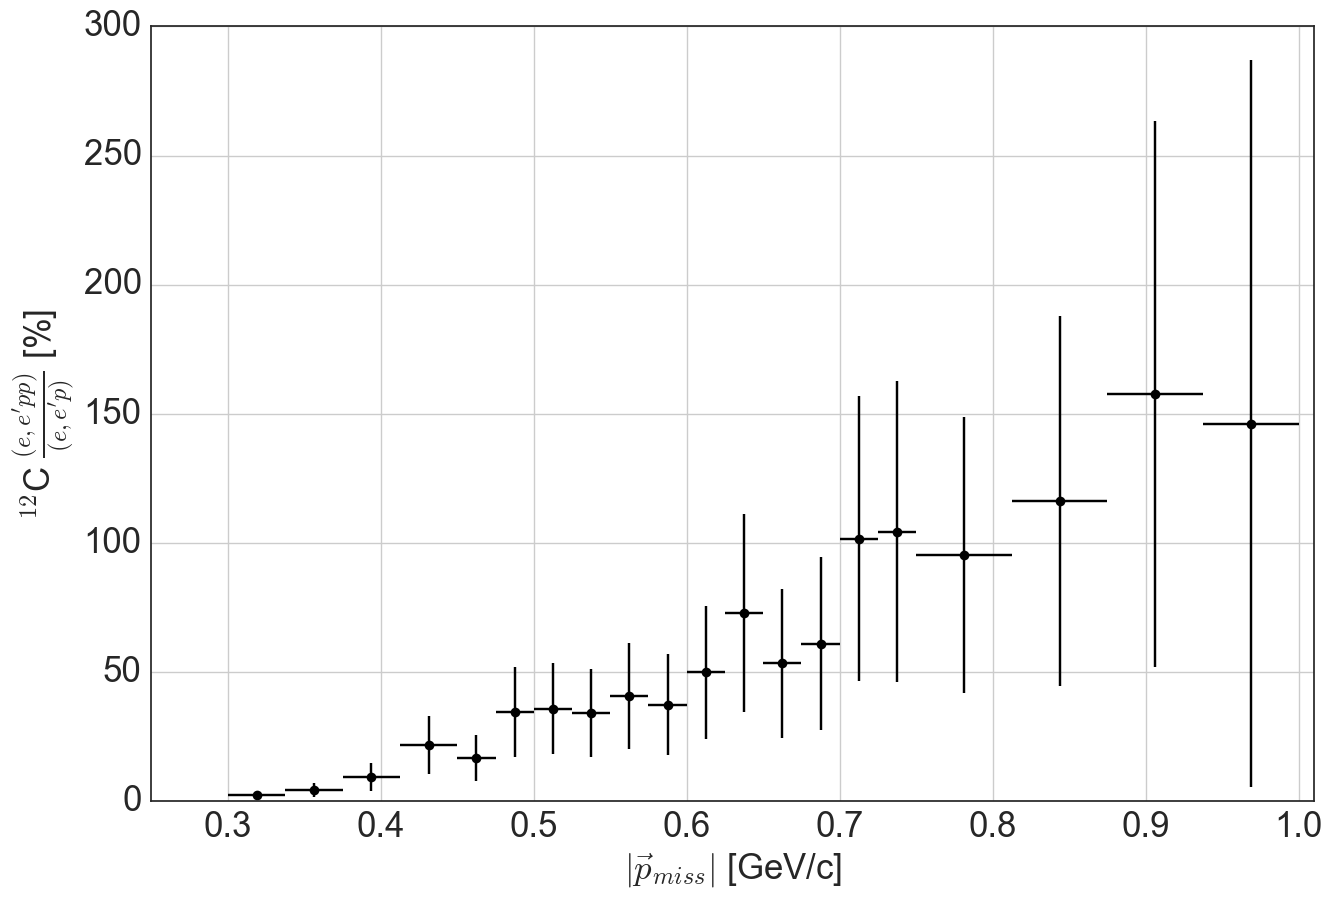

In [23]:
target = 'C12'
name = '$^{12}$C'

fig,ax = plt.subplots(figsize=(15,10))
ratio_corrected , ratio_corrected_err = [] , [] 
for i in range( len(ratio) ):
    ratio_corrected.append(ratio[i] * correction[i])
    ratio_corrected_err.append( ratio_corrected[-1] * np.sqrt( np.square(ratio_err[i]/ratio[i]) + np.square(correction_err[i]/correction[i]) ))


plt.errorbar(pmiss_bin_center,ratio_corrected,xerr=pmiss_bin_width,yerr=ratio_corrected_err,fmt='ro', color='black')
set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
ax.grid()
# ax.set_ylim(0,21)
ax.set_xlim(0.25,1.01)
fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/C_eepp_eep_acceptanceCorrected.pdf')